In [63]:
import pandas as pd
import numpy as np

In [64]:
df = pd.read_csv('/Users/lohithramesh/Desktop/M.S in Data Science/Semester 3/Machine Learning/Assignment 1/Credit Score Dataset/Train_Preprocessed.csv')

## PCA

* Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional form while preserving as much variance (information) as possible. It achieves this by identifying the directions (principal components) in which the data varies the most. PCA is widely used in exploratory data analysis and preprocessing before applying other machine learning algorithms, as it helps reduce noise, improve visualization, and decrease computational complexity by eliminating less informative features.

* For the PCA analysis, I'll be using a subset of the preprocessed DataFrame from above. This DataFrame contains various columns related to customer financial data. Here’s a brief overview of the selected columns and the reasoning behind their choice:

Selected Dataset Columns

1) **Age:** Indicates the age of the customer, which may influence financial behavior.
2) **Annual_Income:** Represents the yearly income of the customer, a crucial factor in assessing creditworthiness.
3) **Num_Bank_Accounts:** The number of bank accounts held by the customer, reflecting their financial engagement.
4) **Num_Credit_Card:** The number of credit cards owned, which can provide insights into spending habits and credit utilization.
5) **Interest_Rate:** The average interest rate on loans, which is essential for understanding loan costs.
6) **Num_of_Loan:** The total number of loans taken, which might indicate the customer's credit exposure.
7) **Delay_from_due_date:** The average delay from due dates, a sign of payment reliability.
8) **Num_of_Delayed_Payment:** Total delayed payments, which is a direct indicator of credit risk.
9) **Changed_Credit_Limit:** Changes in credit limit, showing how credit management is handled.
10) **Num_Credit_Inquiries:** The number of times the customer has applied for credit, reflecting their credit-seeking behavior.
11) **Outstanding_Debt:** The total amount of debt owed, critical for evaluating financial health.
12) **Credit_Utilization_Ratio:** Measures how much of the available credit is being used, a key indicator of credit risk.
13) **Credit_History_Age:** Length of credit history, which can impact credit scores.
14) **Total_EMI_per_month:** Total monthly equated monthly installment (EMI), reflecting monthly financial obligations.
15) **Amount_invested_monthly:** Average monthly investment amount, indicating savings behavior.
16) **Monthly_Balance:** The average monthly balance in accounts, which can reveal liquidity status.
17) **Unemployment_Rate:** Current unemployment rate, potentially influencing customer financial stability.

* To prepare the data for PCA, we will focus on the selected quantitative features from the DataFrame while removing any qualitative data and labels. Here's the Python code to format the data, along with explanations and a display of the cleaned DataFrame.

**Step 1: Selecting and Preparing the Data**

* We will select only the quantitative columns from the DataFrame for PCA, ensuring all non-numeric columns are excluded.

In [65]:
features = [
    'Age',
    'Annual_Income',
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Interest_Rate',
    'Num_of_Loan',
    'Delay_from_due_date',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Num_Credit_Inquiries',
    'Outstanding_Debt',
    'Credit_Utilization_Ratio',
    'Credit_History_Age',
    'Total_EMI_per_month',
    'Amount_invested_monthly',
    'Monthly_Balance',
    'Unemployment_Rate'
]

# Selecting only quantitative columns
pca_data = df[features].copy()

# Displaying the first few rows of the prepared DataFrame for PCA
pca_data.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Unemployment_Rate
0,23,19114.12,3.0,4.0,3,4,3.000000,7.0,11.27,4.0,809.98,26.822620,265,49.574949,80.415295,312.494089,4.0
1,23,19114.12,3.0,4.0,3,4,4.428571,6.0,11.27,4.0,809.98,31.944960,268,49.574949,118.280222,284.629162,3.8
2,23,19114.12,3.0,4.0,3,4,3.000000,7.0,10.27,4.0,809.98,28.609352,267,49.574949,81.699521,331.209863,3.6
3,23,19114.12,3.0,4.0,3,4,5.000000,4.0,6.27,4.0,809.98,31.377862,268,49.574949,199.458074,223.451310,3.7
4,23,19114.12,3.0,4.0,3,4,6.000000,6.0,11.27,4.0,809.98,24.797347,269,49.574949,41.420153,341.489231,3.6


**Step 2: Normalize the data** 

* To normalize the data using StandardScaler from Scikit-learn, we will fit and transform our cleaned DataFrame (pca_data) to scale the features so that they have a mean of 0 and a standard deviation of 1. This normalization is essential before applying PCA, as it ensures that all features contribute equally to the analysis.

In [66]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the pca_data
normalized_data = scaler.fit_transform(pca_data)

# Convert the normalized data back to a DataFrame for easier handling
normalized_df = pd.DataFrame(normalized_data, columns=pca_data.columns)

# Displaying the first few rows of the normalized DataFrame
normalized_df.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Unemployment_Rate
0,-0.95713,-0.839282,-0.913454,-0.74193,-1.319266,0.190946,-1.220342,-1.011086,0.129931,-0.461511,-0.533485,-1.067562,0.439717,-0.497038,-0.709737,-0.380916,2.197401
1,-0.95713,-0.839282,-0.913454,-0.74193,-1.319266,0.190946,-1.123985,-1.170717,0.129931,-0.461511,-0.533485,-0.066489,0.469814,-0.497038,-0.390631,-0.571768,0.845154
2,-0.95713,-0.839282,-0.913454,-0.74193,-1.319266,0.190946,-1.220342,-1.011086,-0.017473,-0.461511,-0.533485,-0.718376,0.459782,-0.497038,-0.698914,-0.252728,-0.507093
3,-0.95713,-0.839282,-0.913454,-0.74193,-1.319266,0.190946,-1.085442,-1.489979,-0.607090,-0.461511,-0.533485,-0.177318,0.469814,-0.497038,0.293494,-0.990787,0.169031
4,-0.95713,-0.839282,-0.913454,-0.74193,-1.319266,0.190946,-1.017993,-1.170717,0.129931,-0.461511,-0.533485,-1.463366,0.479846,-0.497038,-1.038368,-0.182323,-0.507093


**Step 3: PCA Implimentation**

* We'll first perform PCA to reduce the dimensionality of our dataset to 2 components.

In [67]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize PCA for 2 components
pca_2d = PCA(n_components=2)

# Fit and transform the normalized data
pca_2d_result = pca_2d.fit_transform(normalized_df)

# Create a DataFrame for the 2D PCA results
pca_2d_df = pd.DataFrame(data=pca_2d_result, columns=['PC1', 'PC2'])

pca_2d_df.head()

,PC1,PC2
0,-1.511791,-1.501780
1,-1.583465,-1.256871
2,-1.579462,-1.393701
3,-1.807293,-1.077772
4,-1.475511,-1.611588


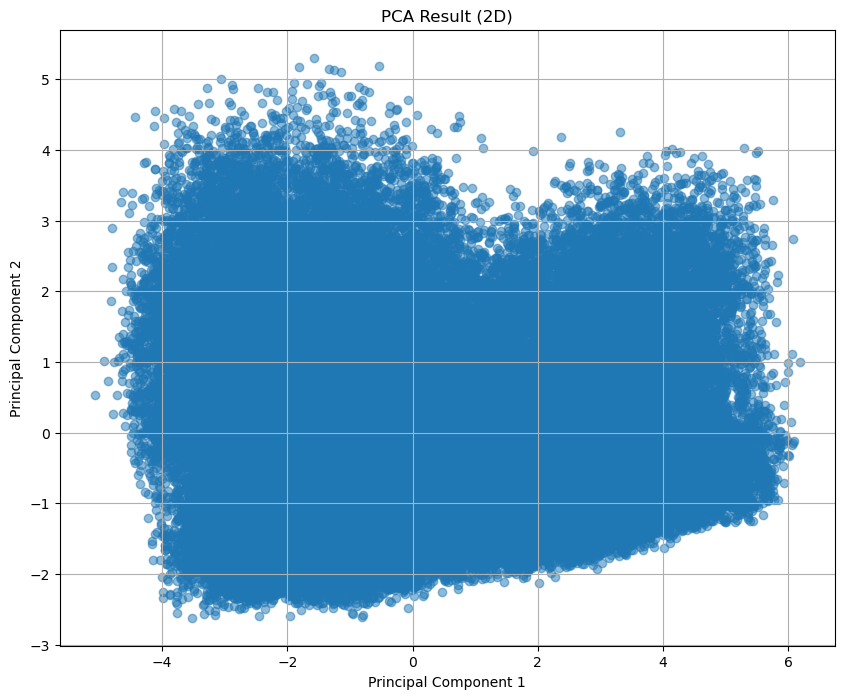

In [68]:
# Plotting the 2D PCA results
plt.figure(figsize=(10, 8))
plt.scatter(pca_2d_df['PC1'], pca_2d_df['PC2'], alpha=0.5)
plt.title('PCA Result (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

* The output visualizes a 2D projection of high-dimensional data using Principal Component Analysis (PCA). The x-axis represents Principal Component 1, and the y-axis represents the Principal Component 2. These two components capture the most variance in the dataset, but the spread indicates that there are no clearly defined clusters, suggesting that the data may not have strong separable groupings based on these two dimensions alone.

* Now, we'll perform PCA to reduce the dimensionality of our dataset to 3 components.

In [69]:
# Initialize PCA for 3 components
pca_3d = PCA(n_components=3)

# Fit and transform the normalized data
pca_3d_result = pca_3d.fit_transform(normalized_df)

# Create a DataFrame for the 3D PCA results
pca_3d_df = pd.DataFrame(data=pca_3d_result, columns=['PC1', 'PC2', 'PC3'])

pca_3d_df.head()

,PC1,PC2,PC3
0,-1.511789,-1.501453,1.339578
1,-1.583463,-1.256643,0.888718
2,-1.579462,-1.393288,1.049780
3,-1.807290,-1.077953,1.468680
4,-1.475510,-1.611338,1.389421


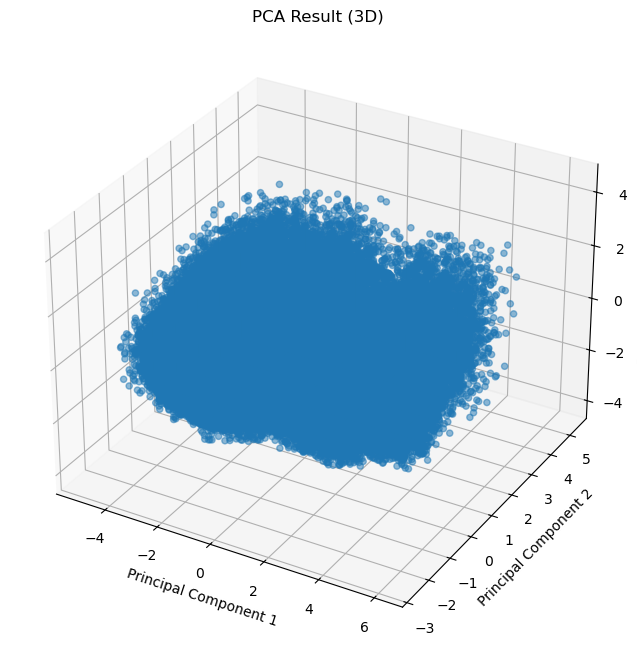

In [70]:
# Plotting the 3D PCA results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_3d_df['PC1'], pca_3d_df['PC2'], pca_3d_df['PC3'], alpha=0.5)
ax.set_title('PCA Result (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

* This 3D plot represents the projection of the dataset into three principal components using PCA. The x, y, and z axes correspond to the Principal Components 1,2 and 3 respectively. These components capture the highest variance in the data, but the dense, elliptical cluster shape indicates that the data may not have clearly distinct groupings across these three dimensions as well.

* After performing PCA, we can check how much variance is retained in the 2D and 3D datasets.

In [71]:
# Explained variance ratio
explained_variance_2d = pca_2d.explained_variance_ratio_
explained_variance_3d = pca_3d.explained_variance_ratio_

# Print the explained variance
print(f"Explained variance for 2D PCA: {explained_variance_2d.sum() * 100:.2f}%")
print(f"Explained variance for 3D PCA: {explained_variance_3d.sum() * 100:.2f}%")

Explained variance for 2D PCA: 46.95%
Explained variance for 3D PCA: 53.46%


* The explained variance for the 2D PCA is 46.95%, meaning the first two principal components capture nearly half of the data's variability. Expanding to 3D PCA increases the explained variance to 53.46%, suggesting that the third component provides some additional, though limited, insight into the data's structure.

**Dimensions for 95% Variance**

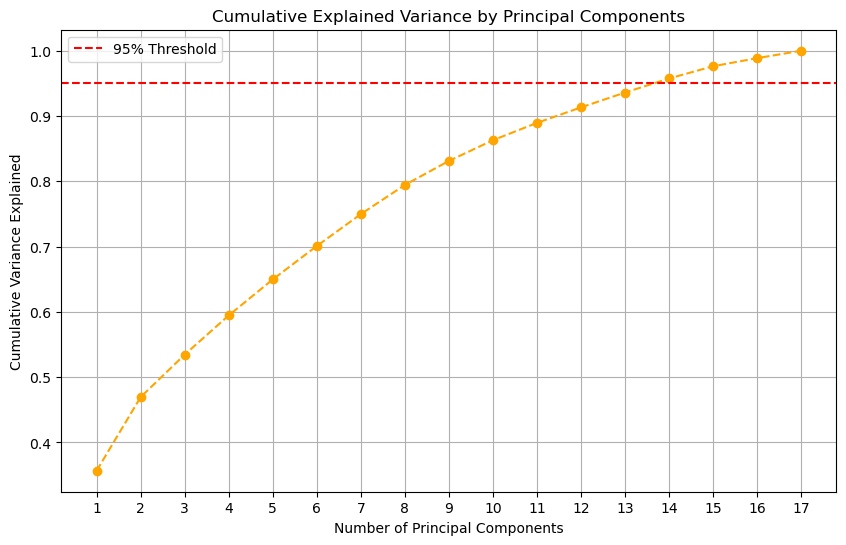

Cumulative Variance Explained by Principal Component 1: 0.3567
Cumulative Variance Explained by Principal Component 2: 0.4695
Cumulative Variance Explained by Principal Component 3: 0.5346
Cumulative Variance Explained by Principal Component 4: 0.5946
Cumulative Variance Explained by Principal Component 5: 0.6497
Cumulative Variance Explained by Principal Component 6: 0.7009
Cumulative Variance Explained by Principal Component 7: 0.7497
Cumulative Variance Explained by Principal Component 8: 0.7944
Cumulative Variance Explained by Principal Component 9: 0.8312
Cumulative Variance Explained by Principal Component 10: 0.8629
Cumulative Variance Explained by Principal Component 11: 0.8895
Cumulative Variance Explained by Principal Component 12: 0.9132
Cumulative Variance Explained by Principal Component 13: 0.9360
Cumulative Variance Explained by Principal Component 14: 0.9575
Cumulative Variance Explained by Principal Component 15: 0.9762
Cumulative Variance Explained by Principal Compon

In [72]:
# Initialize PCA with the number of components equal to the number of features
pca = PCA(n_components=normalized_df.shape[1])

# Fit PCA to the normalized data
pca.fit(normalized_df)

# Get explained variance
explained_variance = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# Plotting the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='orange')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.axhline(y=0.95, color='red', linestyle='--', label='95% Threshold')
plt.legend()
plt.grid()
plt.show()

# Print cumulative explained variance for each component
for i, cum_var in enumerate(cumulative_variance, start=1):
    print(f'Cumulative Variance Explained by Principal Component {i}: {cum_var:.4f}')

* It can be observed that we need 14 PC to get a Cumulative Variance Explained by Principal Component 14: 0.9575

**Top 3 Eigen Values**

In [73]:
# Eigenvalues
eigenvalues = pca_3d.explained_variance_

# Print the top three eigenvalues
print("Top three eigenvalues:", eigenvalues[:3])

Top three eigenvalues: [6.06451256 1.91763411 1.10539013]


## Clustering

(A)

1. #### K-Means Clustering:
* K-Means is a partition-based clustering algorithm that aims to divide the dataset into K distinct clusters. It works by initializing K centroids, assigning each data point to the nearest centroid, and then updating the centroids based on the mean of the assigned points. This process is repeated until convergence. It Primarily uses Euclidean distance to measure similarity between points and centroids.\

**Strengths:**
* Simple and efficient for large datasets.
* Fast convergence; often scales well with the number of samples.
* Easily interpretable results (cluster centroids).

**Limitations:**
* Requires the number of clusters (K) to be specified in advance.
* Sensitive to the initial placement of centroids, which can lead to different results in different runs (though techniques like K-Means++ can mitigate this).
* Struggles with non-spherical clusters and varying cluster sizes/densities.
  
2. #### Hierarchical Clustering
* Hierarchical clustering creates a tree-like structure (dendrogram) of clusters. It can be either agglomerative (bottom-up) or divisive (top-down). In agglomerative clustering, each data point starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy based on a distance metric. It can use various distance metrics, including Euclidean, Manhattan, and others. The choice of linkage criteria (single, complete, average, etc.) affects how clusters are formed.

**Strengths:**
* Does not require the number of clusters to be specified in advance.
* Provides a visual representation of the clustering process (dendrogram).
* Can reveal the data structure at different levels of granularity.

**Limitations:**
* Computationally expensive, especially for large datasets.
* Sensitive to noise and outliers, which can distort the clustering process.
* Choosing the right number of clusters can be subjective when using the dendrogram.
  
3. #### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
   
* DBSCAN identifies clusters based on the density of data points in a specified region. It requires two parameters: epsilon (the maximum distance between two samples for them to be considered in the same neighborhood) and min_samples (the minimum number of samples in a neighborhood to form a dense region). Points are classified as core points, border points, or noise based on their neighborhood density. It Typically uses Euclidean distance, but other distance metrics can also be applied.
  
**Strengths:**
* Can identify clusters of arbitrary shape and is effective at detecting outliers (noise).
* Does not require the number of clusters to be specified beforehand.
* Handles varying cluster sizes and densities well.
  
**Limitations:**
* Performance can degrade with high-dimensional data due to the "curse of dimensionality."
* The choice of parameters ϵ and min_samples can significantly impact the clustering results.
* Struggles with clusters that are too close together or have varying densities.

(B)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Explained variance ratio by each principal component:
 [0.35673247 0.11280088 0.06502217]
Cumulative explained variance:
 [0.35673247 0.46953334 0.53455551]


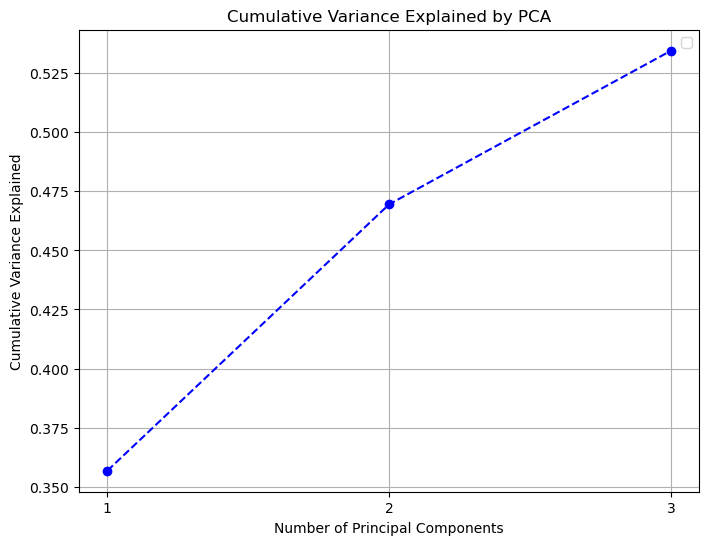

In [45]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Ensure you have your normalized data prepared as 'normalized_df'
# Standardize the features
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df[features])  # Replace 'df[features]' with your actual DataFrame if needed

# Perform PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(normalized_data)

# Create a DataFrame for the PCA result
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])

# Calculate the explained variance ratio and cumulative variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Print explained variance
print("Explained variance ratio by each principal component:\n", explained_variance)
print("Cumulative explained variance:\n", cumulative_variance)

# Plot the cumulative variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Variance Explained by PCA')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.xticks(range(1, len(cumulative_variance) + 1))  # Ensure x-ticks correspond to the number of components
plt.grid()
plt.legend()
plt.show()

* The amount of variance captured after reducing it to 3D is **53.5%**

(C)

1. #### KMeans Clustering with the Silhouette Method:


* We'll perform KMeans clustering on the 3D PCA-reduced dataset, and use the Silhouette Method to identify the best values for the number of clusters (k). The silhouette score helps us find an optimal value of k by evaluating how well-separated the clusters are.

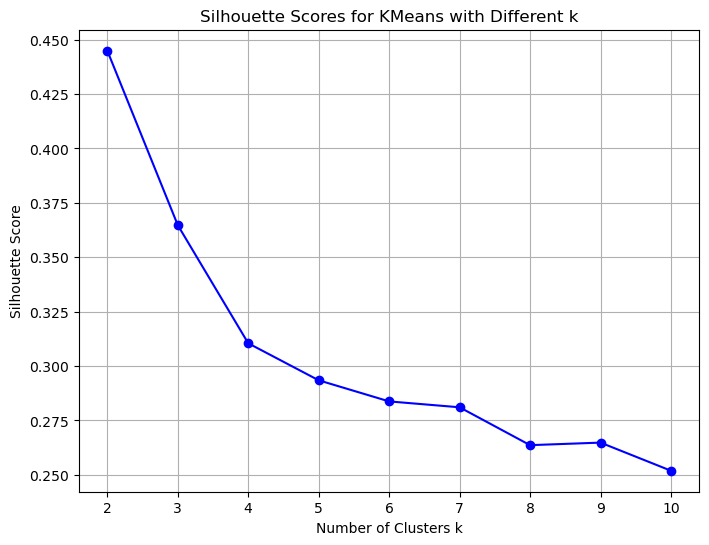

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

# Define a function to calculate silhouette scores for different k values
def find_best_k(data, max_k=10):
    silhouette_scores = []
    K = range(2, max_k+1)
    
    for k in K:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(data, labels)
        silhouette_scores.append(silhouette_avg)
    
    # Plot silhouette scores
    plt.figure(figsize=(8, 6))
    plt.plot(K, silhouette_scores, 'bo-')
    plt.title('Silhouette Scores for KMeans with Different k')
    plt.xlabel('Number of Clusters k')
    plt.ylabel('Silhouette Score')
    plt.grid()
    plt.show()

    # Return the three best values of k based on silhouette scores
    sorted_k = sorted(range(len(silhouette_scores)), key=lambda i: silhouette_scores[i], reverse=True)[:3]
    return [K[i] for i in sorted_k]

# Find the best k values using silhouette method
best_ks = find_best_k(pca_df)

In [47]:
best_ks

[2, 3, 4]

* The silhouette score decreases as the number of clusters (k) increases, with the highest scores observed at k = 2, 3, and 4. These values represent the top 3 choices for k in KMeans clustering, as they provide the most distinct separation for this dataset.

In [48]:
# Create a mapping for labels to numbers
label_to_num = {'Good': 2, 'Standard': 1, 'Poor': 0}

# Convert original_labels to numerical values
original_labels = df['Credit_Score'].map(label_to_num)
original_labels

0        2
1        2
2        2
3        2
4        2
        ..
99995    0
99996    0
99997    0
99998    1
99999    0
Name: Credit_Score, Length: 100000, dtype: int64

Centroids for k=2:
[[ 2.82853187e+00  5.35948982e-02 -2.36723418e-03]
 [-1.65316266e+00 -3.13240539e-02  1.38355279e-03]]
Data Range: PC1 (-5.073138991822626, 6.183573937586225), PC2 (-2.618820381539853, 5.303895153908144), PC3 (-4.085209962937848, 4.414591760014186)


/var/folders/wy/fb319nn12db5rdprbkkf0yqr0000gn/T/ipykernel_12635/626772322.py:31: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],


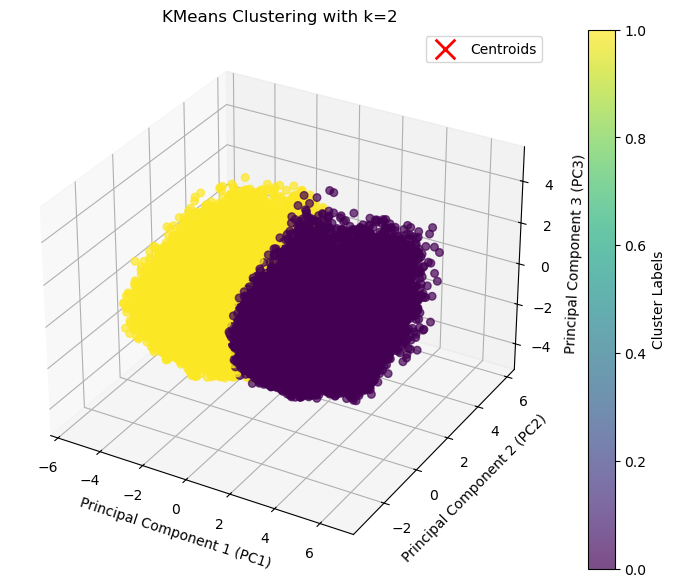

Centroids for k=3:
[[-1.22744796 -1.07587488  0.18446765]
 [-2.03867529  1.42550936 -0.23580697]
 [ 2.97910863  0.11655779 -0.0266698 ]]
Data Range: PC1 (-5.073138991822626, 6.183573937586225), PC2 (-2.618820381539853, 5.303895153908144), PC3 (-4.085209962937848, 4.414591760014186)


/var/folders/wy/fb319nn12db5rdprbkkf0yqr0000gn/T/ipykernel_12635/626772322.py:31: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],


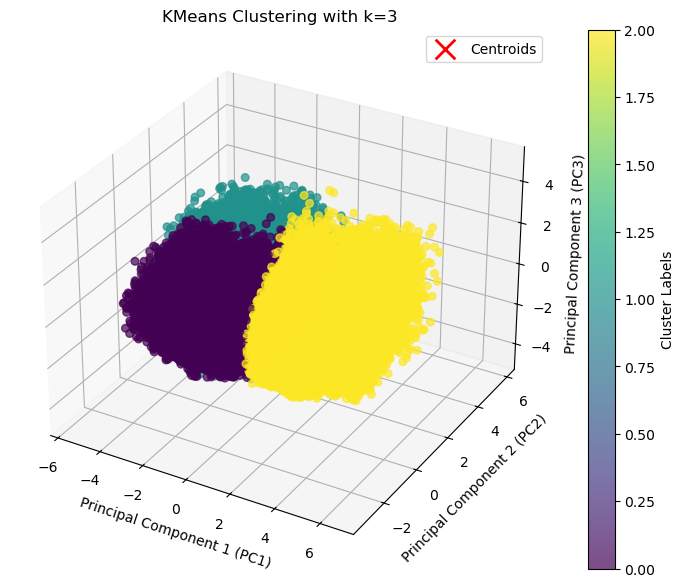

Centroids for k=4:
[[-1.28690779 -1.0671018   0.18978888]
 [-2.11840191  1.41668254 -0.28051757]
 [ 2.91347066 -0.66640008 -0.23774472]
 [ 2.78545718  1.51891631  0.41248719]]
Data Range: PC1 (-5.073138991822626, 6.183573937586225), PC2 (-2.618820381539853, 5.303895153908144), PC3 (-4.085209962937848, 4.414591760014186)


/var/folders/wy/fb319nn12db5rdprbkkf0yqr0000gn/T/ipykernel_12635/626772322.py:31: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],


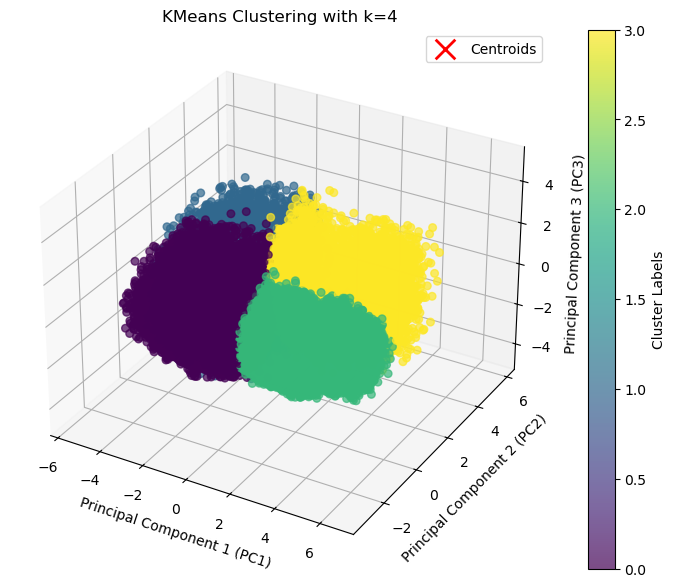

In [49]:
def plot_kmeans(data, k):
    # Initialize KMeans with the specified number of clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Fit the model and predict cluster labels
    predicted_labels = kmeans.fit_predict(data)
    # Get cluster centroids
    centroids = kmeans.cluster_centers_

    # Create a 3D plot
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot with predicted cluster labels as colors
    scatter = ax.scatter(data['PC1'], data['PC2'], data['PC3'], 
                         c=predicted_labels, cmap='viridis', s=30, alpha=0.7)

    # Add colorbar for cluster labels
    cbar = fig.colorbar(scatter, ax=ax)
    cbar.set_label('Cluster Labels')

    # Print the centroids to check their values
    print(f"Centroids for k={k}:")
    print(centroids)

    # Check the ranges of the data
    print(f"Data Range: PC1 ({data['PC1'].min()}, {data['PC1'].max()}), "
          f"PC2 ({data['PC2'].min()}, {data['PC2'].max()}), "
          f"PC3 ({data['PC3'].min()}, {data['PC3'].max()})")

    # Plot centroids with a distinct color and marker
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
               s=200, c='red', label='Centroids', marker='x', edgecolor='black', linewidth=2)

    # Set titles and labels
    ax.set_title(f'KMeans Clustering with k={k}')
    ax.set_xlabel('Principal Component 1 (PC1)')
    ax.set_ylabel('Principal Component 2 (PC2)')
    ax.set_zlabel('Principal Component 3 (PC3)')

    # Explicitly set limits for better visibility
    ax.set_xlim(data['PC1'].min() - 1, data['PC1'].max() + 1)
    ax.set_ylim(data['PC2'].min() - 1, data['PC2'].max() + 1)
    ax.set_zlim(data['PC3'].min() - 1, data['PC3'].max() + 1)

    # Set grid
    ax.grid(True)

    plt.legend()
    plt.show()

# Plot KMeans results for the best 3 k values
for k in best_ks:
    plot_kmeans(pca_df, k)

The three plots represent KMeans clustering applied to a dataset, visualized with different numbers of clusters (k).

* k=2: The first plot shows two distinct clusters, with points in purple and yellow. The dataset is split into two groups, though the boundary between them seems quite distinct.
* k=3: The second plot splits the dataset into three clusters. The new cluster, represented in teal, appears to divide the data further, but with some overlap between groups.
* k=4: The third plot introduces a fourth cluster (green), further subdividing the data into four regions. This further separation may suggest over-segmentation, depending on the data characteristics.

In [50]:
from sklearn.metrics import accuracy_score
from scipy.optimize import linear_sum_assignment
import numpy as np
from sklearn.cluster import KMeans

# Function to find the optimal mapping between true labels and predicted clusters
def get_cluster_accuracy(true_labels, predicted_labels):
    # Create a confusion matrix between the true labels and the predicted clusters
    confusion_matrix = np.zeros((len(np.unique(true_labels)), len(np.unique(predicted_labels))))
    
    # Fill confusion matrix
    for i in range(len(true_labels)):
        confusion_matrix[true_labels[i], predicted_labels[i]] += 1
    
    # Use linear assignment (Hungarian Algorithm) to find the best matching
    row_ind, col_ind = linear_sum_assignment(-confusion_matrix)  # Negative because we want maximum assignment
    
    # Create a mapping between predicted clusters and true labels
    mapped_labels = np.zeros_like(predicted_labels)
    for i, j in zip(row_ind, col_ind):
        mapped_labels[predicted_labels == j] = i
    
    # Return the accuracy based on the best possible label mapping
    return accuracy_score(true_labels, mapped_labels)

# Mapping original labels ('Good', 'Standard', 'Poor') to numeric labels
label_to_num = {'Good': 2, 'Standard': 1, 'Poor': 0}
# Make sure `original_labels` contains the numeric labels
numeric_labels = df['Credit_Score'].map(label_to_num)

# Running KMeans and calculating accuracy for a specific value of k
def kmeans_accuracy(data, k, true_labels):
    kmeans = KMeans(n_clusters=k, random_state=42)  # Added random_state for reproducibility
    predicted_labels = kmeans.fit_predict(data)
    
    # Calculate accuracy based on the optimal mapping between predicted clusters and true labels
    accuracy = get_cluster_accuracy(true_labels, predicted_labels)
    return accuracy

# Testing for the best 3 k values
for k in best_ks:
    accuracy = kmeans_accuracy(pca_df, k, numeric_labels)
    print(f"Accuracy for KMeans with k={k}: {accuracy:.4f}")

Accuracy for KMeans with k=2: 0.5999
Accuracy for KMeans with k=3: 0.5353
Accuracy for KMeans with k=4: 0.5342


2. #### Hierarchical Clustering and Dendrogram

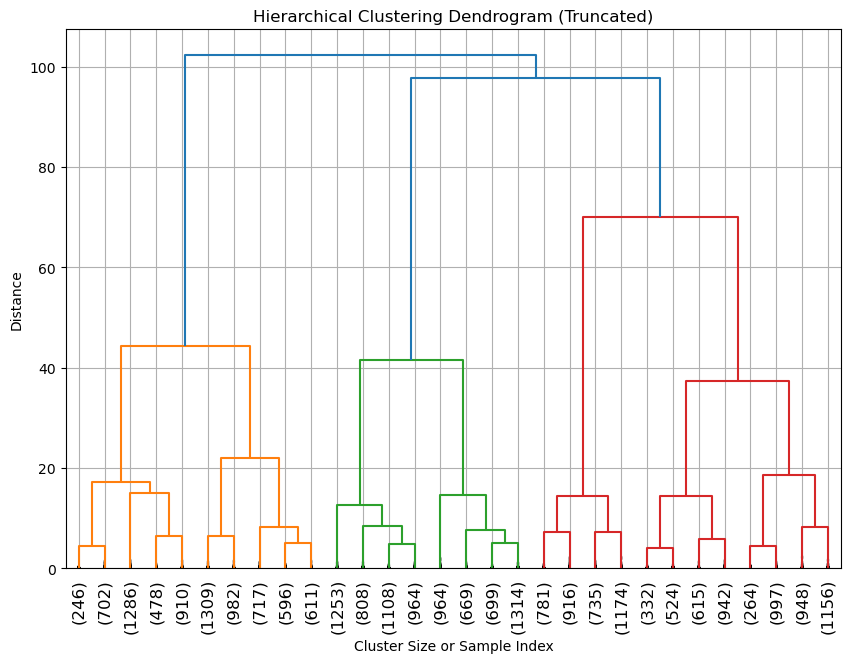

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import squareform

# Assuming pca_df is your DataFrame
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_df)

# Randomly sample a smaller subset of data
sampled_data = pd.DataFrame(scaled_data).sample(n=25000, random_state=42)

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(sampled_data)

# Convert similarity to distance (1 - similarity)
# Ensure diagonal is zero
cosine_dist = 1 - cosine_sim
np.fill_diagonal(cosine_dist, 0)  # Set the diagonal to 0

# Convert the distance matrix into a condensed form
condensed_cosine_dist = squareform(cosine_dist)

# Perform hierarchical clustering on the distance matrix
Z = linkage(condensed_cosine_dist, method='ward')

# Create a dendrogram with reduced complexity
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='lastp', p=30,  # Show only the last 30 merged clusters
           leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram (Truncated)')
plt.xlabel('Cluster Size or Sample Index')
plt.ylabel('Distance')
plt.grid()
plt.show()

* This dendrogram represents the hierarchical clustering process, where individual data points are iteratively merged to form clusters. The y-axis shows the "distance" or dissimilarity between the clusters. At the bottom, each leaf (or number) represents an individual data point. As you move up the tree, branches merge based on their similarity. The longer the vertical line connecting clusters, the more dissimilar the clusters are. The colors represent the main clusters (in this case, three main colors: orange, green, and red). The height at which clusters merge indicates their similarity, with higher merges indicating less similarity.
  
Key Features:
There are a few distinct clusters indicated by the color groupings, suggesting that the data is well-separated at a higher level.
The longer blue lines at the top suggest that the orange and red clusters are more distinct from the green cluster.


3. #### DBSCAN

Estimated number of clusters: 3
Estimated number of noise points: 964


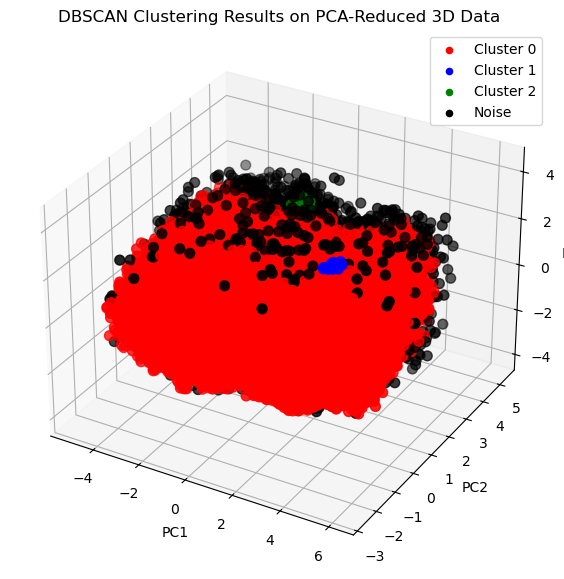

In [53]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Assuming pca_df is your DataFrame with columns ['PC1', 'PC2', 'PC3']
# Standardize the data (DBSCAN is sensitive to the scale of the data)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pca_df)

# Use a suitable eps value based on the graph
dbscan = DBSCAN(eps=0.23, min_samples=10)  # Adjust eps based on the graph
dbscan_labels = dbscan.fit_predict(scaled_data)

# Count and print cluster information
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)  # Exclude noise points (-1 label)
n_noise = list(dbscan_labels).count(-1)
print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

# Create a color map for clusters
# Assign specific colors for each cluster
colors = {0: 'red', 1: 'blue', 2: 'green', -1: 'black'}
cmap = np.array([colors[label] for label in dbscan_labels])

# Visualize the clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of DBSCAN clusters, with colors based on cluster labels
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=cmap, s=50)

# Create a custom legend
legend_labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Noise']
legend_colors = ['red', 'blue', 'green', 'black']
for label, color in zip(legend_labels, legend_colors):
    ax.scatter([], [], c=color, label=label)  # Add invisible points for legend

ax.legend(loc='upper right')
ax.set_title('DBSCAN Clustering Results on PCA-Reduced 3D Data')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

* DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm that groups closely packed points into clusters and identifies points that are far apart as noise (black points in this plot). The plot shows a 3D representation of the data after applying Principal Component Analysis (PCA) to reduce dimensionality.

* Cluster 0 (Red) is the largest and contains the majority of the data points. This is because most of the points are very close to each other in the high-density region. DBSCAN treats these nearby points as part of the same cluster, resulting in a large, spread-out group.
Cluster 1 (Blue) and Cluster 2 (Green) are smaller, more concentrated clusters, likely representing high-density pockets within the data. These are areas where points are more tightly packed compared to the surrounding regions.
Noise (Black points) represents outliers or points that do not belong to any cluster based on DBSCAN’s density criteria.

#### Comparison of Clustering Approaches:

* Hierarchical Clustering creates a tree of clusters, allowing for more flexibility in selecting the number of clusters. This can be useful for visualizing different levels of grouping and understanding how clusters merge. In contrast, KMeans requires a predefined number of clusters (k) and tends to partition the space evenly, even if the natural groupings in the data are uneven.
The dendrogram shows clear clusters at different levels, which can offer more insight compared to KMeans, where accuracy drops as k increases.

* DBSCAN handles outliers and non-spherical clusters more effectively than KMeans. This is evident from the noise points (black) in the DBSCAN plot, which would likely have been forced into clusters in KMeans. DBSCAN is better at identifying smaller dense regions (like the blue and green clusters) and ignoring sparse regions. KMeans, with its rigid spherical partitioning, struggles with overlapping clusters, as shown by the accuracy drop when increasing k from 2 to 4.

#### Conclusion

* Hierarchical Clustering offers more interpretability than KMeans because it shows how clusters evolve at different levels of granularity. It doesn't need a predefined number of clusters, but you can choose clusters by cutting the dendrogram at a certain height.
* KMeans performed reasonably well with k=2, but its performance degraded as more clusters were introduced, possibly due to forcing divisions that aren't naturally present in the data.
* DBSCAN is robust to outliers and can capture clusters of varying shapes and sizes, but is not very useful to use as all the points are dense, making it misclassify most to similar class.